# Summary
### 2018 & 2020
- basic examination of data
    - distribution of
        - term
        - base
        - sentiment
- average sentiment
- average sentiment by base
- average sentiment over time

### Comparison
- chi square GOF test
- two proportion z-test


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

# 2018

In [2]:
df = pd.read_csv("tweets_2018_sa.csv")
df.drop(['Unnamed: 0','Unnamed: 0.1', 'username', 'name'],
        axis=1, inplace=True) # Unnamed cols were accidental artifacts, drop names for privacy 
df.shape

(58672, 11)

In [3]:
df.head()

,tweet,replies_count,retweets_count,likes_count,base,city,term,yr,month,sentiment,confidence
0,There's a wonderful Ruben Blades song La canci...,0.0,0.0,0.0,JB ANDREWS,"Washington, D.C.",icbm,2018.0,9.0,1.0,0.998470
1,I was the Battle Staff Director at Minot AFB. ...,1.0,0.0,17.0,JB ANDREWS,"Washington, D.C.",icbm,2018.0,9.0,0.0,0.992037
2,DGMC doctors perform first Air Force Y-90 canc...,0.0,0.0,0.0,JB ANDREWS,"Washington, D.C.",airmen,2018.0,9.0,1.0,0.999596
3,Building resilience is a skill. No one can do...,0.0,0.0,0.0,JB ANDREWS,"Washington, D.C.",airmen,2018.0,9.0,1.0,0.998051
4,Fun moment at ASC18 VP Pence checks out T-X st...,0.0,0.0,3.0,JB ANDREWS,"Washington, D.C.",airmen,2018.0,9.0,1.0,0.700542


In [4]:
df.sentiment.value_counts(dropna=False)

0.0    35297
1.0    23372
NaN        3
Name: sentiment, dtype: int64

In [5]:
df.loc[:, 'sentiment'].mean()

0.39837051935434387

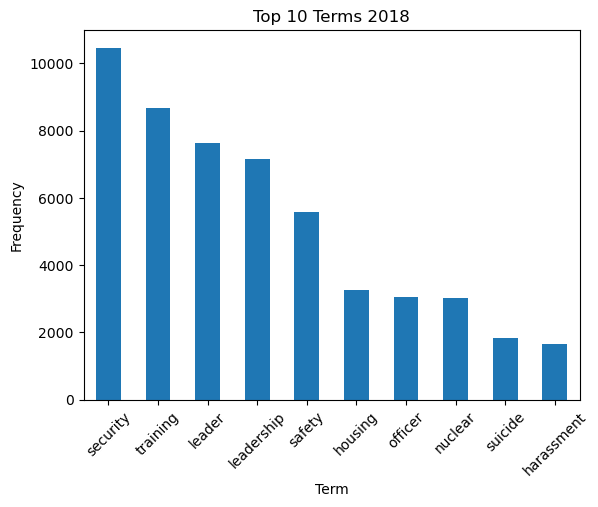

In [6]:
# Get the top 10 terms by value counts
top_terms = df.term.value_counts().head(10)

# Create a bar plot for the top 10 terms
fig, ax = plt.subplots()
top_terms.plot(kind='bar', ax=ax)

ax.set_xlabel('Term')
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Frequency')
ax.set_title('Top 10 Terms 2018')

# Show the plot
plt.show()

In [7]:
# Create a bar plot for the distribution of base with percentages as y-axis

# Calculate the percentage for each bin
# percentages = df.base.value_counts(normalize=True) * 100

# fig, ax = plt.subplots()
# percentages.plot(kind='bar', ax=ax)

# # Set the x-axis label and rotation
# ax.set_xlabel('Base')
# ax.tick_params(axis='x', rotation=45)
# ax.set_ylabel('Percentage of Sample')
# ax.set_yticklabels(['{:,.1f}%'.format(x) for x in ax.get_yticks()])
# ax.set_ylim([0, 100])
# ax.set_title('Distribution of Base 2018')

# plt.show()

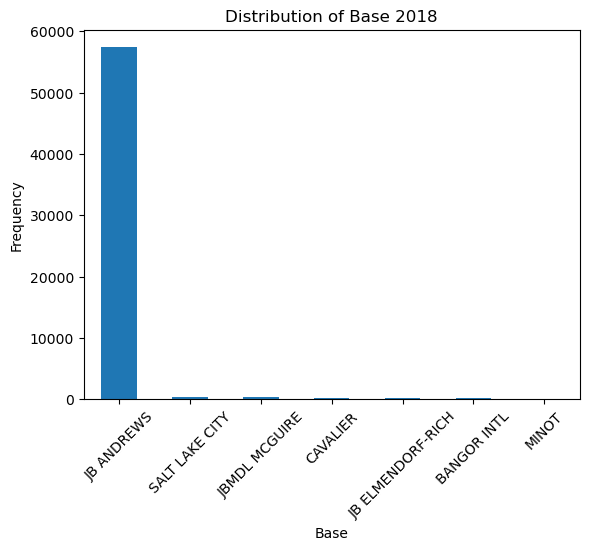

In [8]:
# Create a bar plot for the distribution of base
fig, ax = plt.subplots()

df.base.value_counts().plot(kind='bar', ax=ax)

ax.set_xlabel('Base')
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Base 2018')

plt.show()

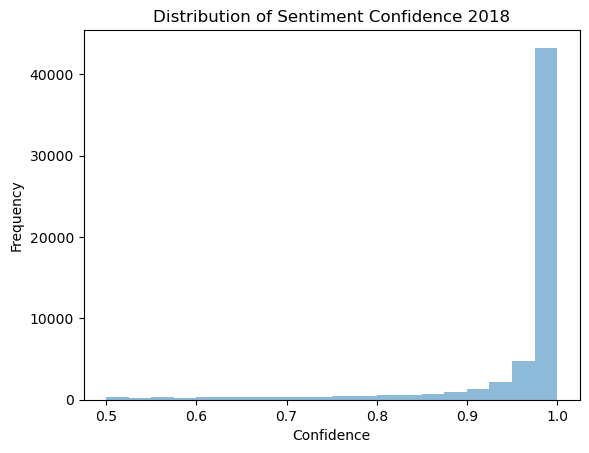

In [9]:

plt.hist(df['confidence'], bins=20, alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Confidence 2018')
plt.show()

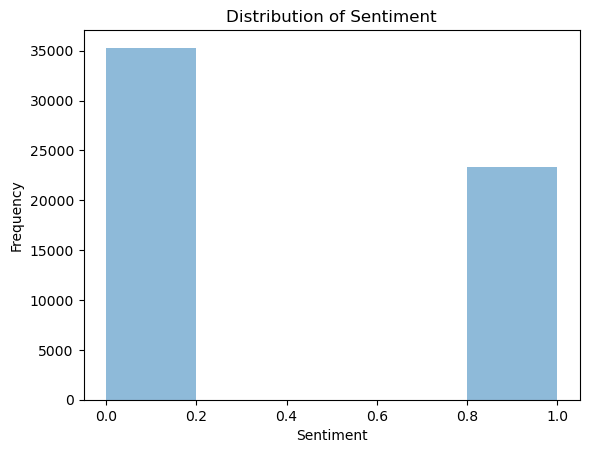

In [10]:
plt.hist(df['sentiment'], bins=5, alpha=0.5)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment')
plt.show()

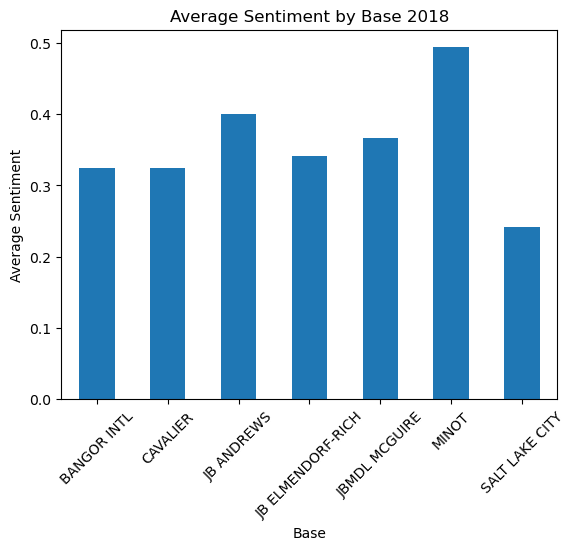

In [11]:
# group the dataframe by base and calculate the mean of the sentiment column
sentiment_by_base = df.groupby('base')['sentiment'].mean()

# plot the average sentiment by base
fig, ax = plt.subplots()
sentiment_by_base.plot(kind='bar', ax=ax)

# set axes
ax.set_xlabel('Base')
ax.set_xticklabels(sentiment_by_base.index, rotation=45)
ax.set_ylabel('Average Sentiment')
ax.set_title('Average Sentiment by Base 2018')

plt.show()

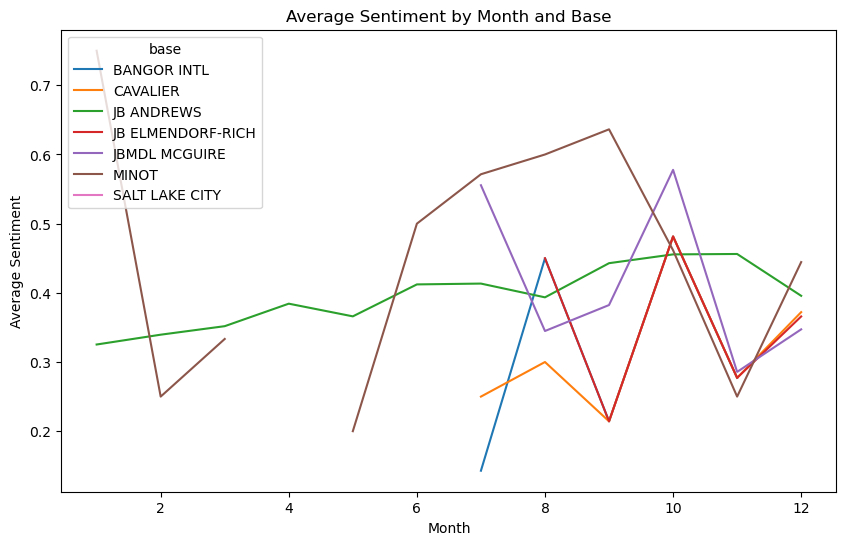

In [12]:
# AVERAGE SENTIMENT BY BASE

# group the data by both date and base, and calculate the average sentiment
grouped = df.groupby(['month', 'base'])['sentiment'].mean().reset_index()

# create a pivot table to rearrange the data for plotting
pivot = grouped.pivot(index='month', columns='base', values='sentiment')

# plot the data and label axes
pivot.plot(figsize=(10,6))
plt.title('Average Sentiment by Month and Base')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')

plt.show()

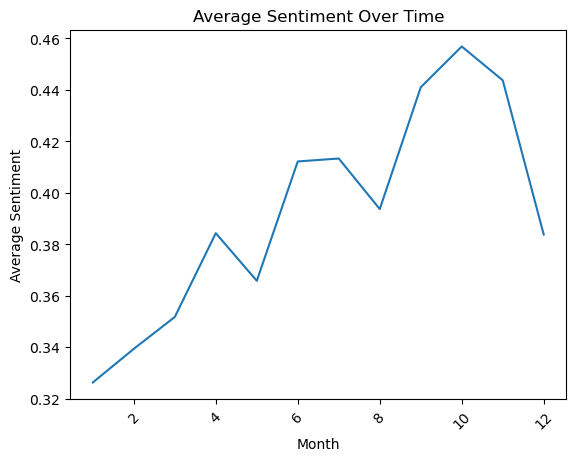

In [13]:
# AVERAGE SENTIMENT OVER TIME

# group the dataframe by date and calculate the mean of the sentiment column
sentiment_by_date = df.groupby('month')['sentiment'].mean()

# plot the sentiment over time
fig, ax = plt.subplots()
ax.plot(sentiment_by_date.index, sentiment_by_date.values)

# set axes and labels
ax.set_xlabel('Month')
plt.xticks(rotation=45)
ax.set_ylabel('Average Sentiment')
ax.set_title('Average Sentiment Over Time')

plt.show()

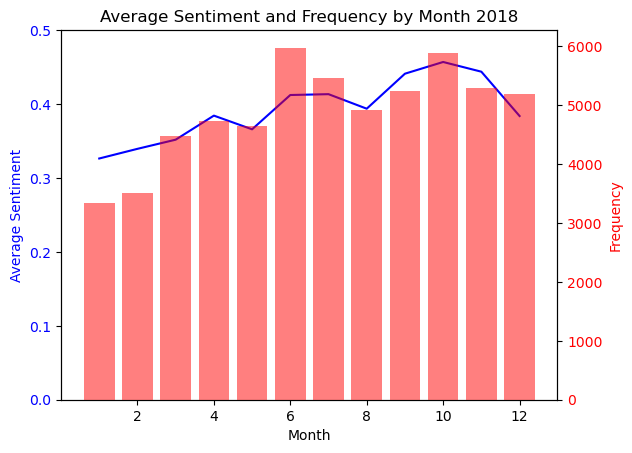

In [14]:
# group the dataframe by month and calculate the mean and count of the sentiment column
sentiment_by_month = df.groupby('month')['sentiment'].agg(['mean', 'count'])

# create two subplots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot the sentiment over time on the first axis
ax1.plot(sentiment_by_month.index, sentiment_by_month['mean'], color='blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Sentiment', color='blue')
ax1.set_ylim((0.000,0.500))
ax1.tick_params(axis='y', labelcolor='blue')

# plot the frequency of values for each month as a bar plot on the second axis
ax2.bar(sentiment_by_month.index, sentiment_by_month['count'], alpha=0.5, color='red')
ax2.set_ylabel('Frequency', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# set plot title
plt.title('Average Sentiment and Frequency by Month 2018')

plt.show()

In [15]:
df_2018 = df.copy()

# 2020

In [16]:
df = pd.read_csv("tweets_2020_sa.csv", lineterminator='\n')
df.drop(['Unnamed: 0', 'username', 'name' ], axis=1, inplace=True)
df.shape

(405525, 11)

In [17]:
df.head()

,tweet,replies_count,retweets_count,likes_count,base,city,term,yr,month,sentiment,confidence
0,In the last handful of days alone Russia has: ...,0.0,1.0,8.0,JB ANDREWS,"Washington, D.C.",B-52,2020,8,0.0,0.997280
1,F-22s Intercept 6 Russian Aircraft Near Alaska...,0.0,0.0,2.0,JB ANDREWS,"Washington, D.C.",B-52,2020,8,0.0,0.961059
2,B-52 over Courthouse Arlington a few minutes a...,16.0,9.0,63.0,JB ANDREWS,"Washington, D.C.",B-52,2020,8,0.0,0.986350
3,I cant even watch Glee without grumbling Where...,0.0,0.0,1.0,JB ANDREWS,"Washington, D.C.",airman,2020,8,0.0,0.982887
4,tbt Found out via social media these two retir...,0.0,0.0,0.0,JB ANDREWS,"Washington, D.C.",airman,2020,8,0.0,0.987221


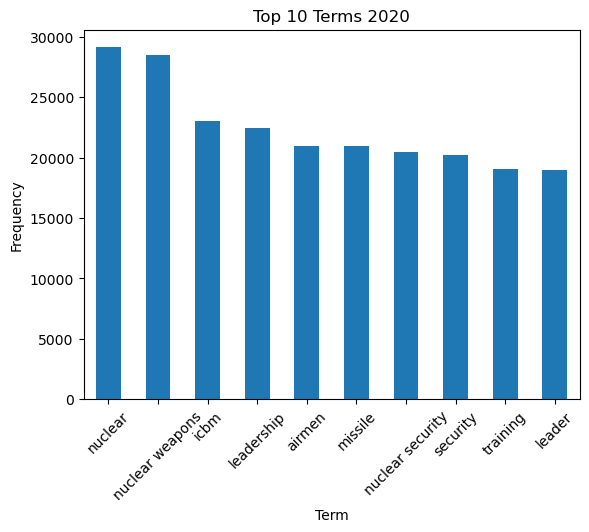

In [18]:
# Get the top 10 terms by value counts
top_terms = df.term.value_counts().head(10)

# Create a bar plot for the top 10 terms
fig, ax = plt.subplots()
top_terms.plot(kind='bar', ax=ax)

ax.set_xlabel('Term')
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Frequency')
ax.set_title('Top 10 Terms 2020')

# Show the plot
plt.show()

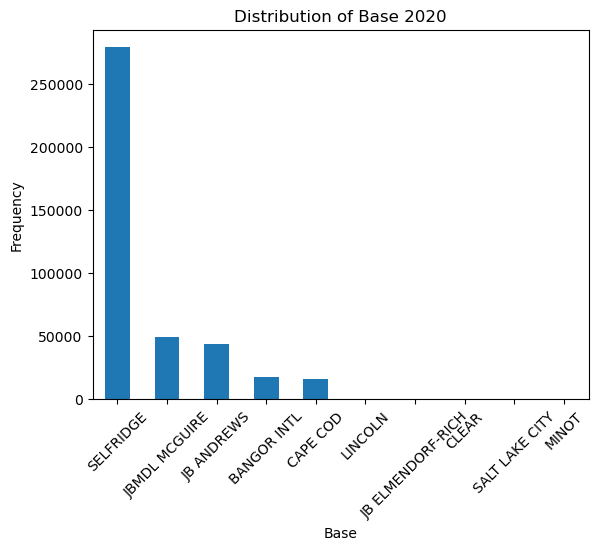

In [19]:
# Create a bar plot for the distribution of base
fig, ax = plt.subplots()

df.base.value_counts().plot(kind='bar', ax=ax)

ax.set_xlabel('Base')
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Base 2020')

plt.show()

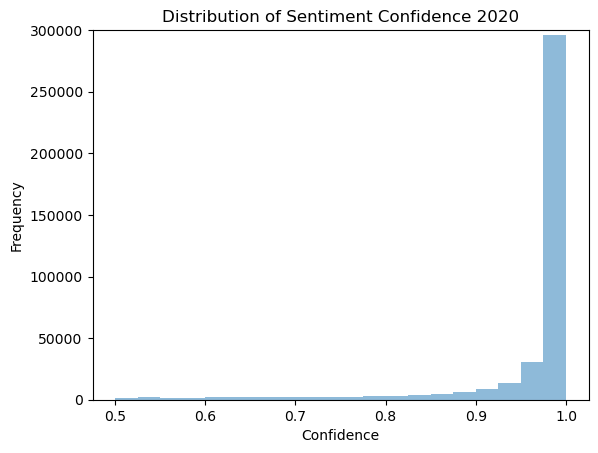

In [20]:
# Distribution of Sentiment Confidence
plt.hist(df['confidence'], bins=20, alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.ylim((0,300000))
plt.title('Distribution of Sentiment Confidence 2020')
plt.show()

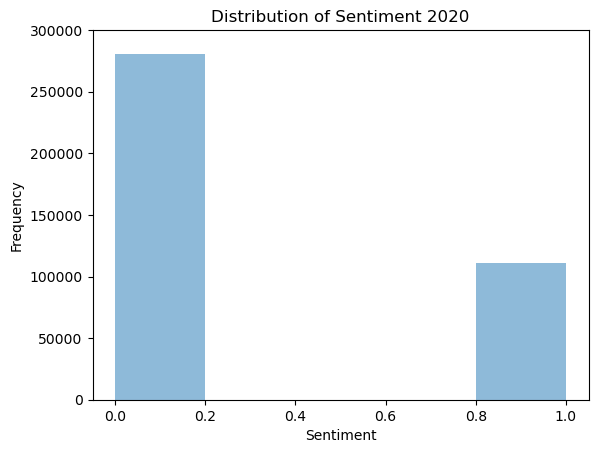

In [21]:
# Distribution of Sentiment
plt.hist(df['sentiment'], bins=5, alpha=0.5)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.ylim((0,300000))
plt.title('Distribution of Sentiment 2020')
plt.show()

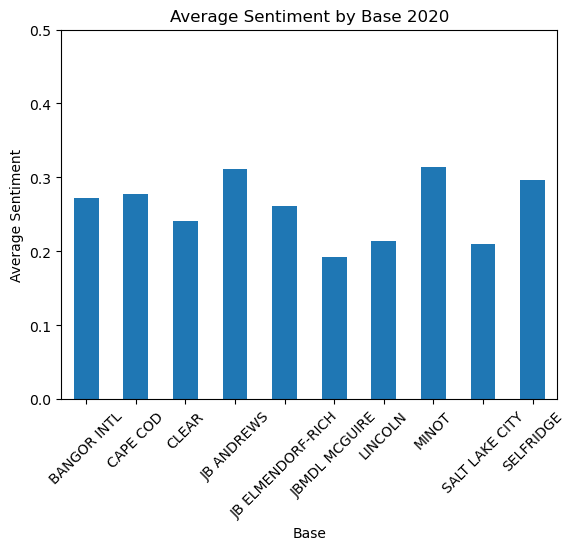

In [22]:
# group the dataframe by base and calculate the mean of the sentiment column
sentiment_by_base = df.groupby('base')['sentiment'].mean()

# plot the average sentiment by base
fig, ax = plt.subplots()
sentiment_by_base.plot(kind='bar', ax=ax)

# set axes and labels
ax.set_xlabel('Base')
ax.set_xticklabels(sentiment_by_base.index, rotation=45)
ax.set_ylabel('Average Sentiment')
ax.set_ylim((0.0,0.5))
ax.set_title('Average Sentiment by Base 2020')

plt.show()

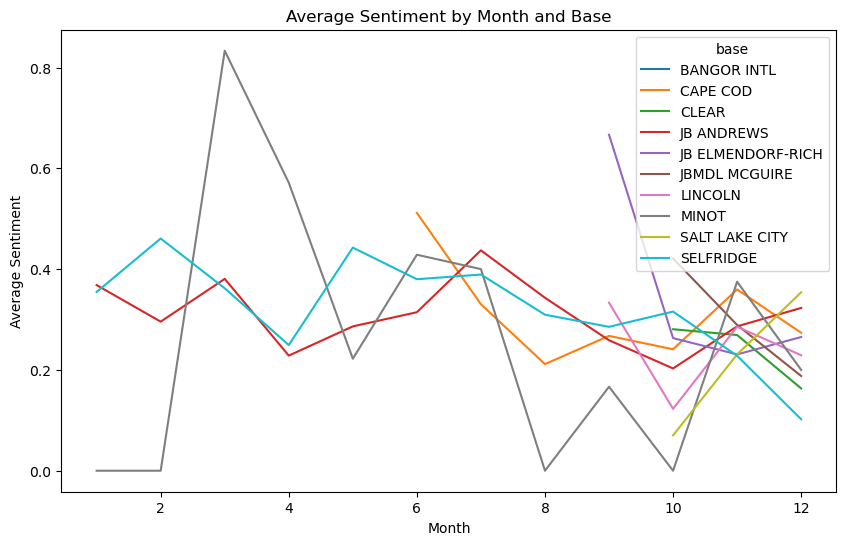

In [23]:
# AVERAGE SENTIMENT BY BASE

# group the data by both date and base, and calculate the average sentiment
grouped = df.groupby(['month', 'base'])['sentiment'].mean().reset_index()

# create a pivot table to rearrange the data for plotting
pivot = grouped.pivot(index='month', columns='base', values='sentiment')

# plot data and add title and axis labels
pivot.plot(figsize=(10,6))
plt.title('Average Sentiment by Month and Base')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')

plt.show()

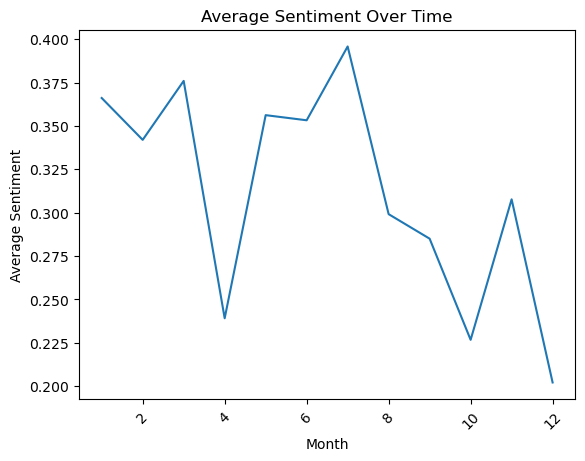

In [24]:
# AVERAGE SENTIMENT OVER TIME

# group the dataframe by date and calculate the mean of the sentiment column
sentiment_by_date = df.groupby('month')['sentiment'].mean()

# plot the sentiment over time
fig, ax = plt.subplots()
ax.plot(sentiment_by_date.index, sentiment_by_date.values)

# set axes and labels
ax.set_xlabel('Month')
plt.xticks(rotation=45)
ax.set_ylabel('Average Sentiment')
ax.set_title('Average Sentiment Over Time')

plt.show()

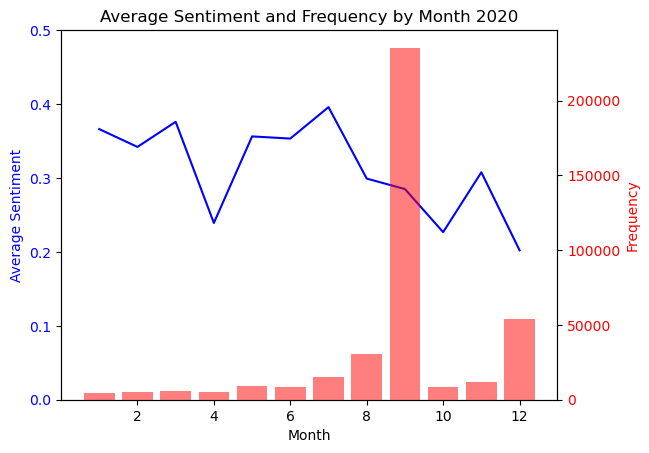

In [25]:
# group the dataframe by month and calculate the mean and count of the sentiment column
sentiment_by_month = df.groupby('month')['sentiment'].agg(['mean', 'count'])

# create two subplots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot the sentiment over time on the first axis
ax1.plot(sentiment_by_month.index, sentiment_by_month['mean'], color='blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Sentiment', color='blue')
ax1.set_ylim((0.0, 0.500))
ax1.tick_params(axis='y', labelcolor='blue')

# plot the frequency of values for each month as a bar plot on the second axis
ax2.bar(sentiment_by_month.index, sentiment_by_month['count'], alpha=0.5, color='red')
ax2.set_ylabel('Frequency', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Average Sentiment and Frequency by Month 2020')

plt.show()

In [26]:
df_2020 = df.copy()

In [27]:
df_2020.sentiment.mean()

0.2838328328991706

# Comparison

### Chi Square GOF Test
- Does sentiment follow a uniform distribution?

Somehow I got a *relatively* small amount of NaN sentiments in 2020 and 3 in 2018 (unclear how that occured)

In [28]:
df_2018.sentiment.value_counts(dropna=False)

0.0    35297
1.0    23372
NaN        3
Name: sentiment, dtype: int64

In [29]:
df_2020.sentiment.value_counts(dropna=False)

0.0    280971
1.0    111355
NaN     13199
Name: sentiment, dtype: int64

In [30]:
# remove NaN
observed_2018 = df_2018.sentiment.values
observed_2018 = observed_2018[~np.isnan(observed_2018)]

observed_2020 = df_2020.sentiment.values
observed_2020 = observed_2020[~np.isnan(observed_2020)]

# get counts of classes for each year
counts_2018 = np.bincount(observed_2018.astype(int))
counts_2020 = np.bincount(observed_2020.astype(int))

In [31]:
# perform Chi-Square Goodness of Fit Test for uniform model distribution
stat, pval = stats.chisquare(f_obs=counts_2018)
print('p-value 2018: {0:0.2f}'.format(pval))
stat, pval = stats.chisquare(f_obs=counts_2020)
print('p-value 2020: {0:0.2f}'.format(pval))

p-value 2018: 0.00
p-value 2020: 0.00


### 2-Proportion Z-Test
- Is there a statistically significant difference in the proportion of positive tweet sentiments in 2018 vs 2020?
- https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html

In [32]:
# sample random subset from 2020 at size of 2018
filtered_2020 = df_2020[df_2020['sentiment'].notnull()] #remove NaN first since origin unclear
sample_2020 = filtered_2020.sample(n=58672, replace=False, random_state=42)

observed_sample = sample_2020.sentiment.values

In [33]:
# observed proportions
print ("2018: ", np.unique(observed_2018, return_counts=True))
print ("2020: ", np.unique(observed_sample, return_counts=True))

2018:  (array([0., 1.]), array([35297, 23372]))
2020:  (array([0., 1.]), array([42095, 16577]))


In [34]:
n_sentiments = [35297, 42095]
n_rows = [35297+23372, 42095+16577]

zstat, pval = proportions_ztest(count=n_sentiments, nobs=n_rows, alternative="two-sided")
print('{0:0.2f}'.format(pval))

0.00


In [35]:
print(35297 /(35297+23372) )

0.6016294806456561


In [36]:
print(42095 /(42095+16577) )

0.717463185164985


Yes, there is a statistically significant difference (p <<< 0.05) in sentiment proportion between 2018 and 2020. Referring back to the prior analysis, it would appear that 2018 was ~60% negative while 2020 was ~72% negative. This supports my hypothesis that COVID could have had a negative impact on tweet sentiment / base health.